In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


<h1> 1. Data Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Load Data
data = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The dataset has 8807 rows and 12 columns:

* show_id: unique id of each show (not much of a use for us in this notebook)
* type: The category of a show, can be either a Movie or a TV Show
* title: Name of the show
* director: Name of the director(s) of the show
* cast: Name of actors and other cast of the show
* country: Name of countries the show is available to watch on Netflix
* date_added: Date when the show was added on Netflix
* release_year: Release year of the show
* rating: Show rating on netflix
* duration: Time duration of the show
* listed_in: Genre of the show
* description: Some text describing the show

<h1> 2. Visualize The Missing Value

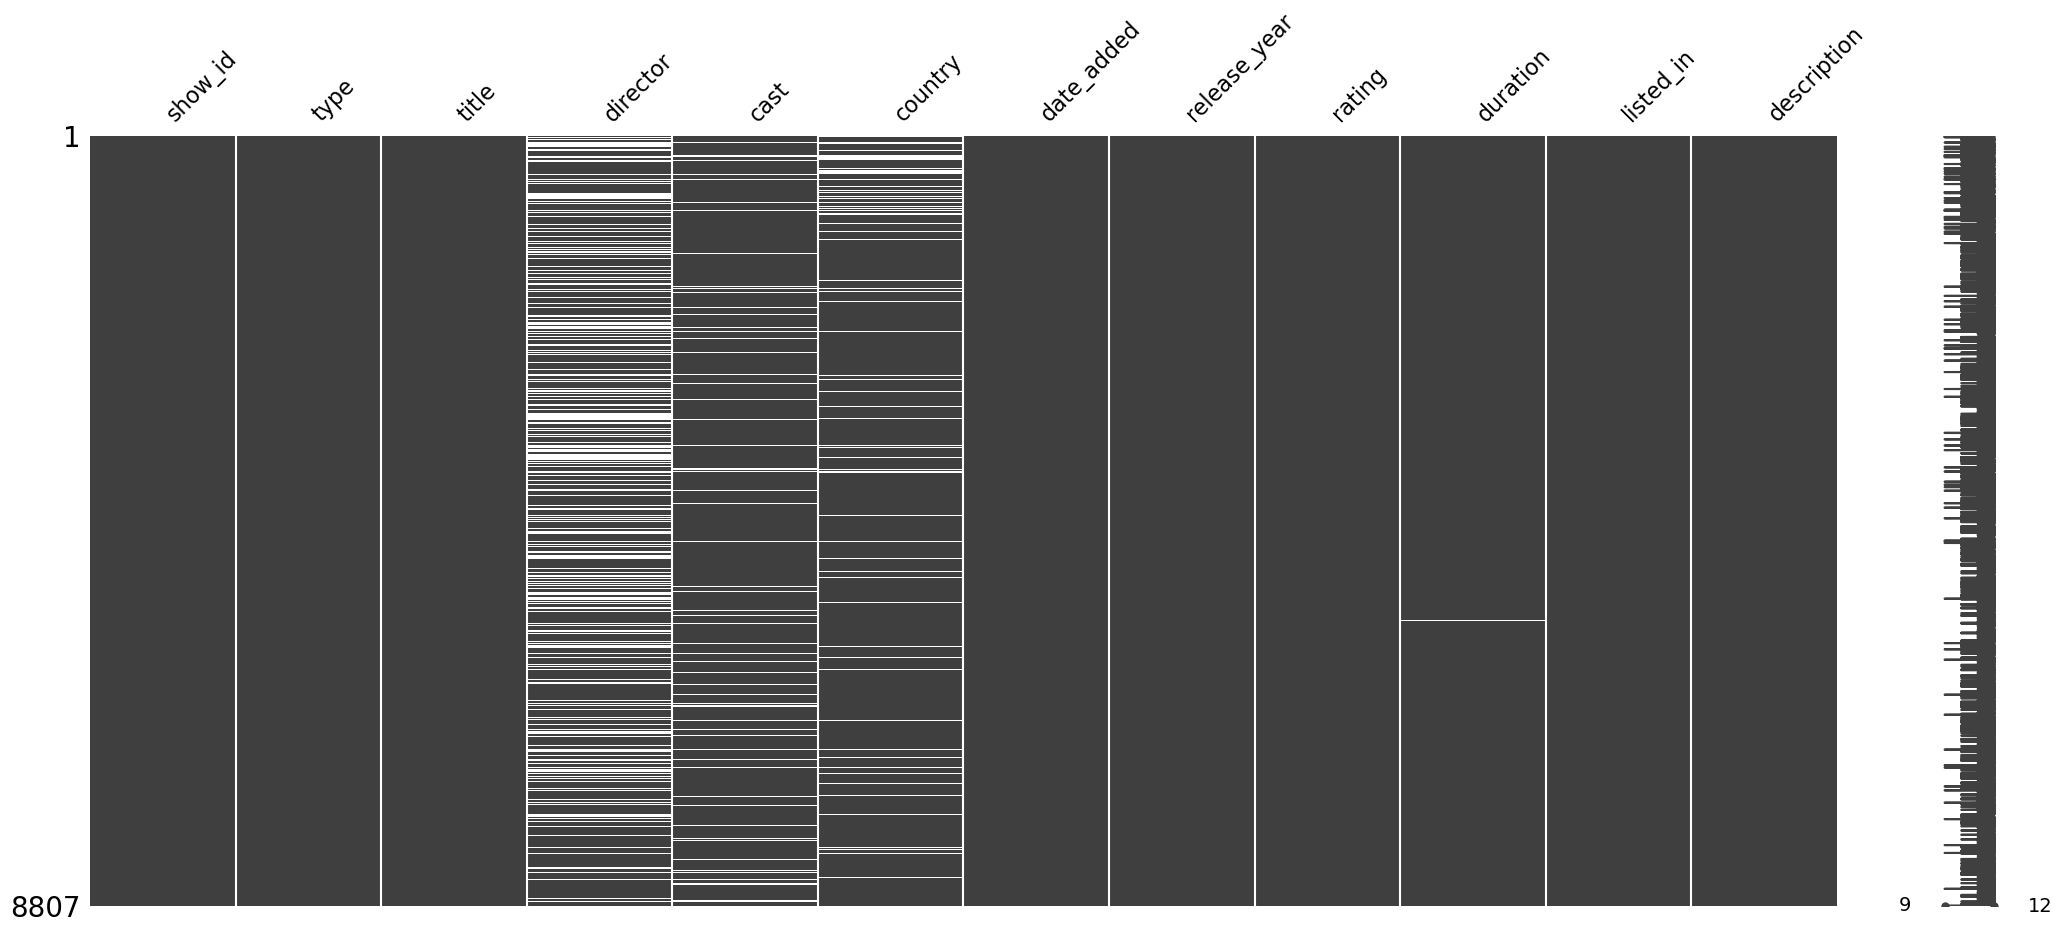

In [5]:
# Visualize missing values as a matrix
msno.matrix(data);

Using this matrix we can find the pattern of missingness in the dataset. From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "date_added" shows a different pattern.

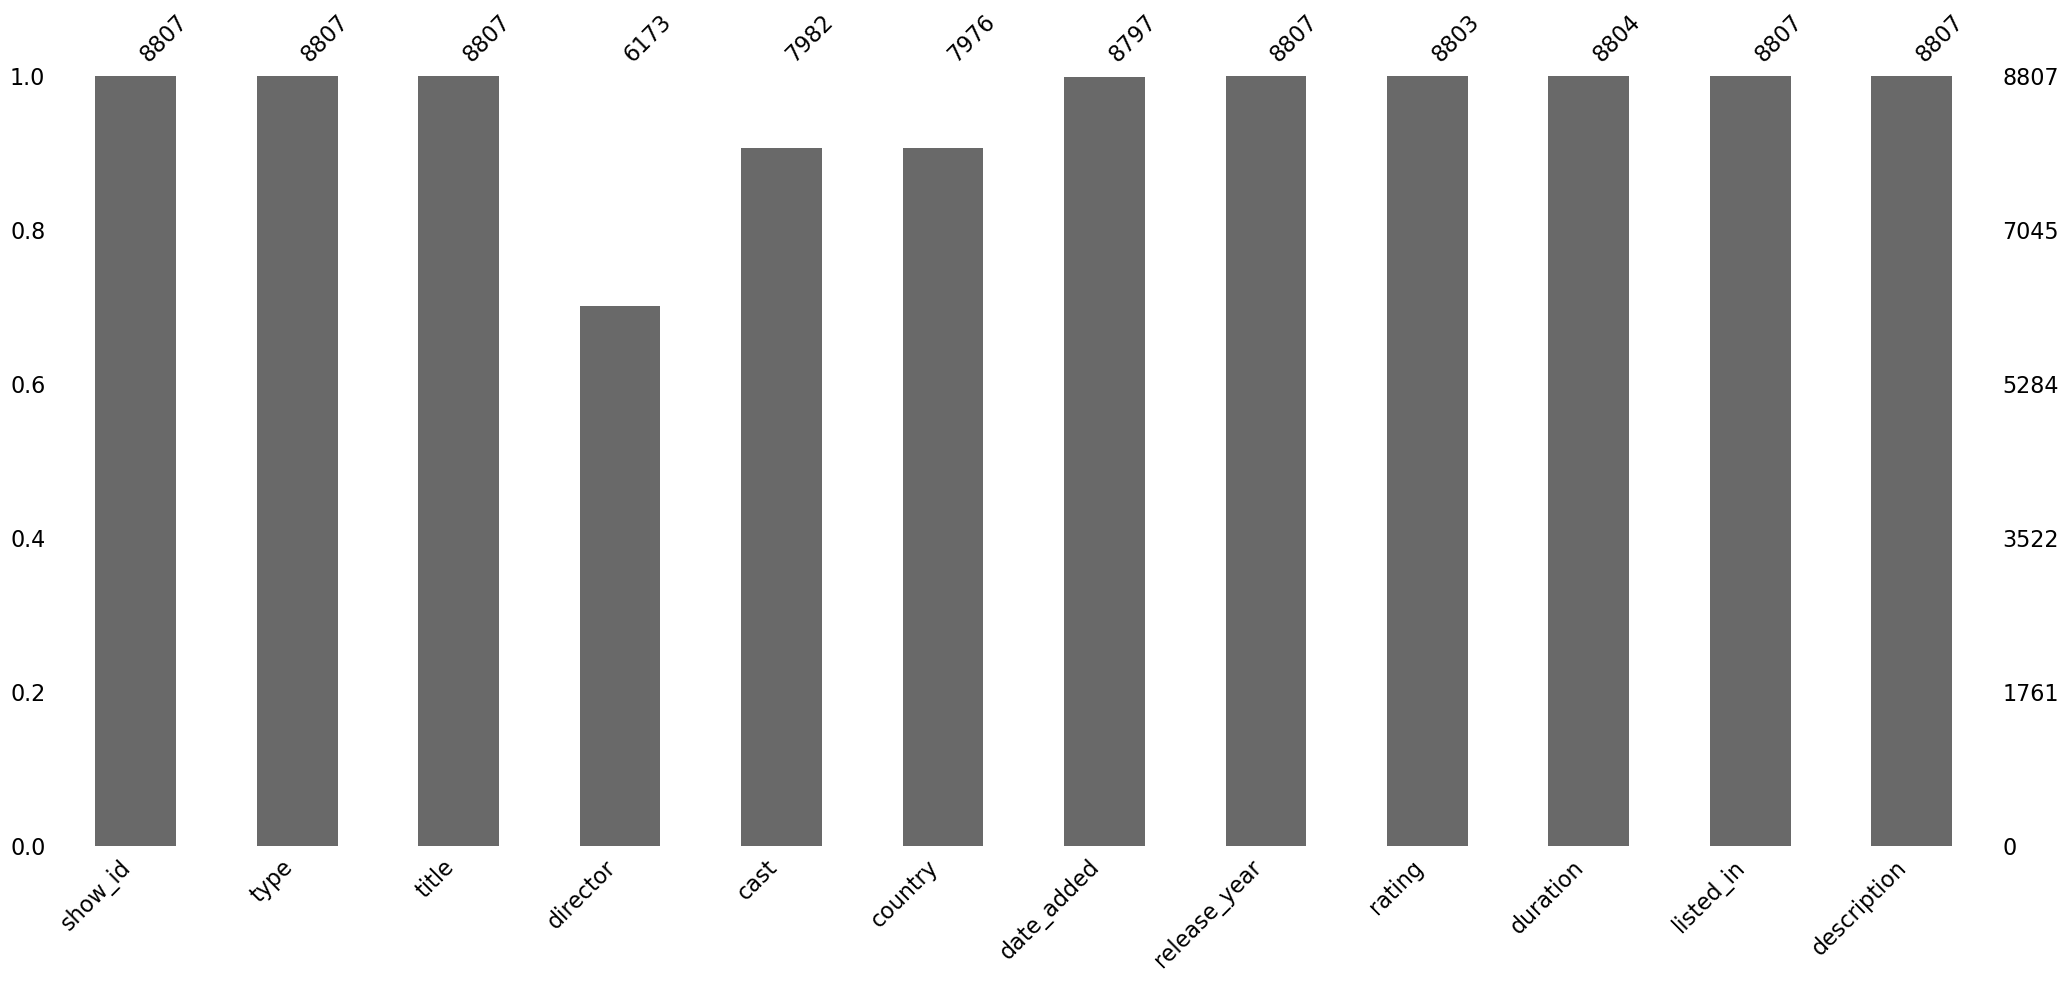

In [6]:
# Visualize the number of missing values as a bar chart
msno.bar(data);

This bar chart gives you an idea about how many missing values are there in each column. "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

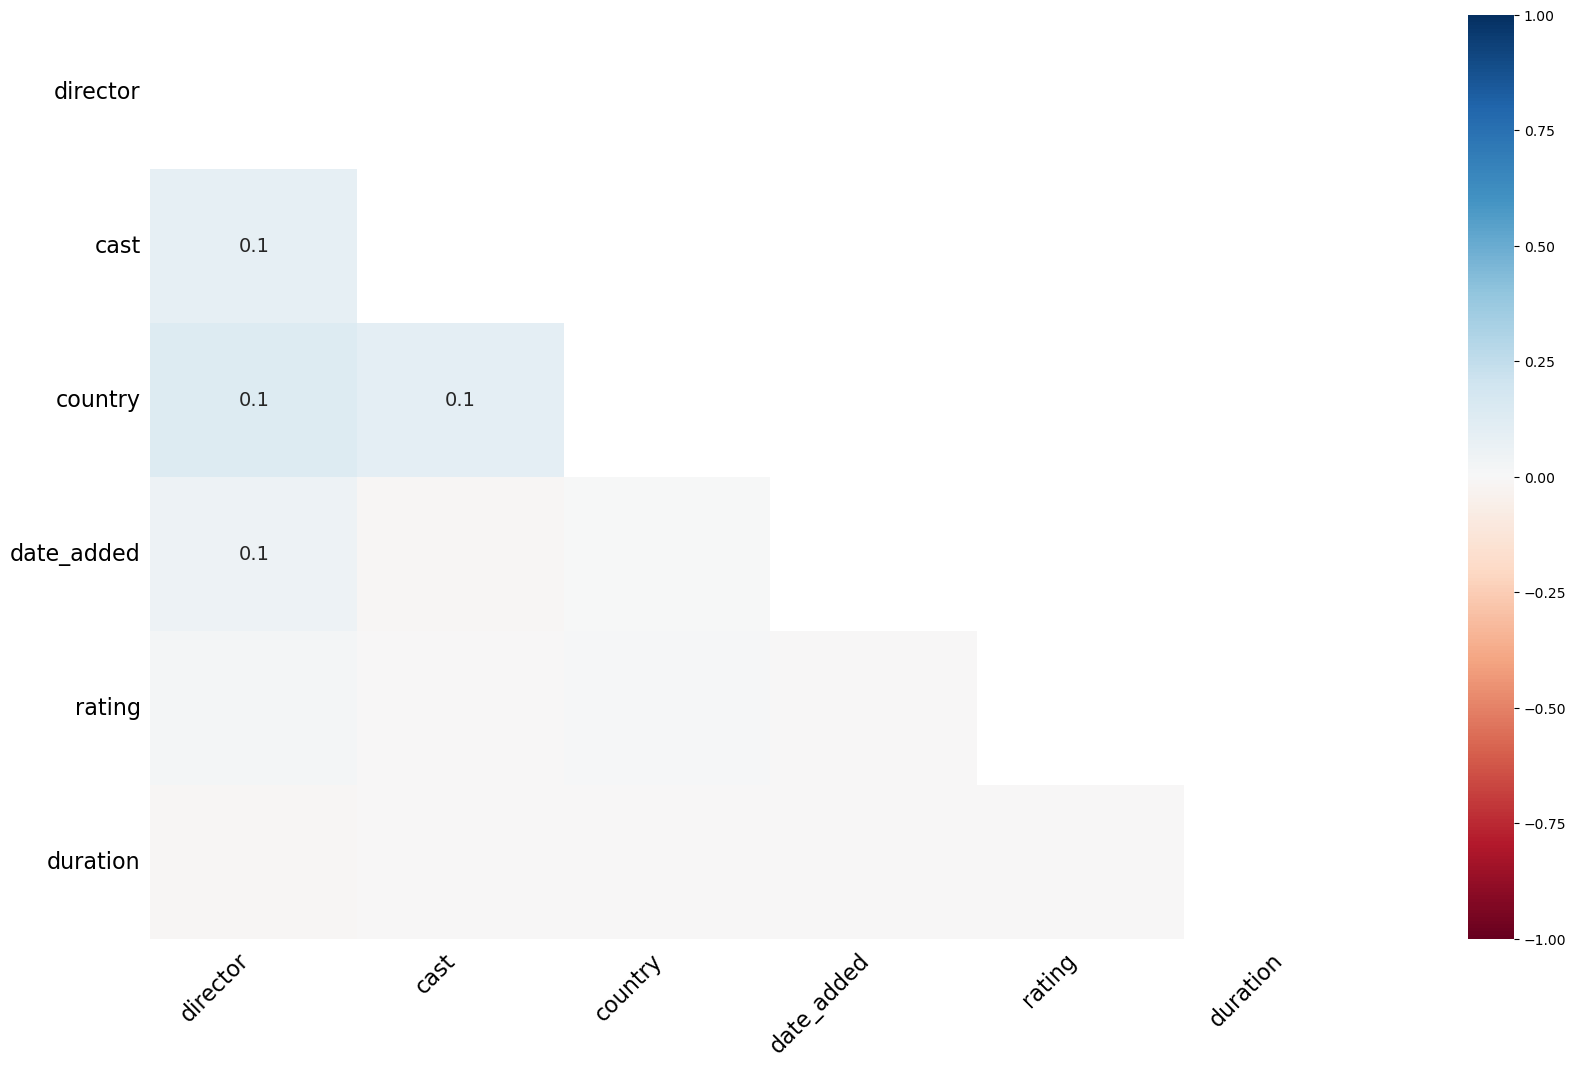

In [7]:
# Visualize the correlation between the number of missing values in different columns as a heatmap
msno.heatmap(data);

Heatmap shows the correlation of missingness between every 2 columns. A value near 0 means there is no dependence between the occurrence of missing values of two variables.

In [8]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

director's null rate : 29.908027705234474%
cast's null rate : 9.367548540933349%
country's null rate : 9.435676166685592%
date_added's null rate : 0.11354604292040424%
rating's null rate : 0.04541841716816169%
duration's null rate : 0.034063812876121265%


<h1> 3. Data Cleaning

In [9]:
#Detect missing values
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The missing values are in:

* director: Very less information for the analysis so this column will be dropped
* cast: there are too many diferent values so it will be dropped
* country: Important variable hence we need to fix this
* date_added: there are just a few cases so lets just drop them
* rating: there are just a few cases so lets drop them

<h3> Fix the rating & duration column

In [10]:
data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [11]:
data[data["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [12]:
data.dropna(subset = ['rating'], inplace=True)
data.dropna(subset = ['duration'], inplace=True)

In [13]:
print(data.shape)

(8800, 12)


Drop "director" and "cast" columns

In [14]:
data = data.drop(['director', 'cast'], axis=1)
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h3> Fix "date_added" column

In [15]:
data[data['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Since it is difficult to find the date_added so I will drop these as they are only 10 rows.

In [16]:
data=data[data["date_added"].notna()]

<h3> Fix "country" missing values

In [17]:
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [18]:
# Lets retrieve just the first country
data['principal_country'] = data['country'].apply(lambda x: x.split(",")[0])
data['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

Let's check the clean data

In [19]:
data.isna().sum()

show_id              0
type                 0
title                0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
principal_country    0
dtype: int64

In [20]:
data.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
principal_country    object
dtype: object

There are some entry where "country" has multiple values. so i think i will add a new column with just the first one so we can check witch regions have more productions

<h3> Generate new columns (Year & Month) Based on Date_Added Columns


Year and month

In [21]:
data['year_added'] = data['date_added'].apply(lambda x: x.split(" ")[-1])
data['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [22]:
data['month_added'] = data['date_added'].apply(lambda x: x.split(" ")[0])
data['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

Targets based on rating

In [23]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

data['target_ages'] = data['rating'].replace(ratings_ages)
data['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

Let's fix the datatype

In [24]:
# type should be a category
data['type'] = pd.Categorical(data['type'])

# target_ages is another category (4 classes)
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
data['year_added'] = pd.to_numeric(data['year_added'])

In [25]:
data.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
principal_country      object
year_added              int64
month_added            object
target_ages          category
dtype: object

<h1> 4. Data Visualization

<h2> **Type Of Netflix content**

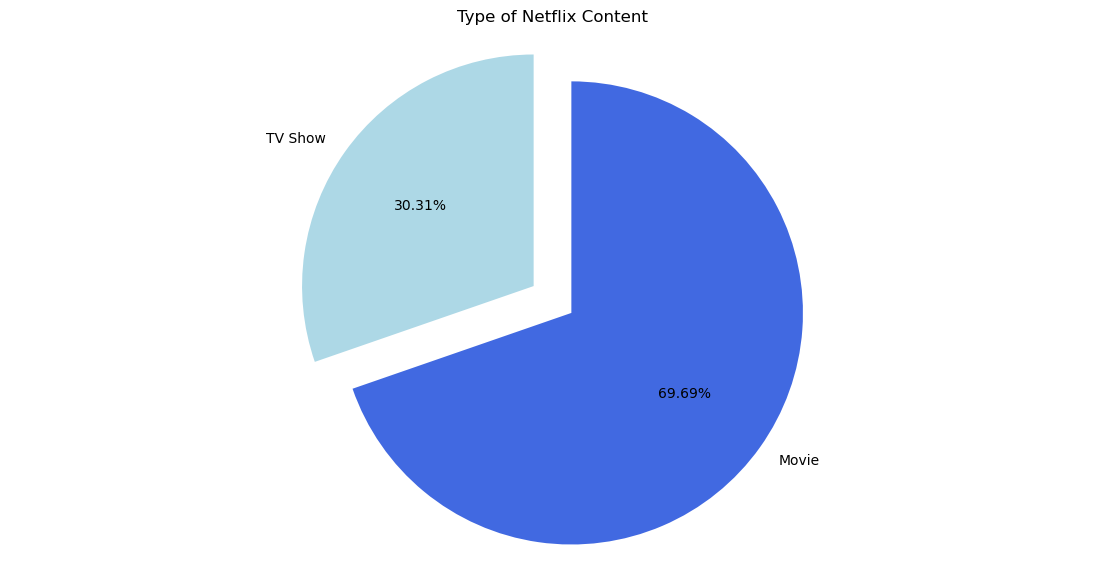

In [26]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(data['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In [27]:
netflix_tv = data[data["type"] == "TV Show"]
netflix_movies = data[data["type"] == "Movie"]

<h2>**Top Movie Rating Analysis**

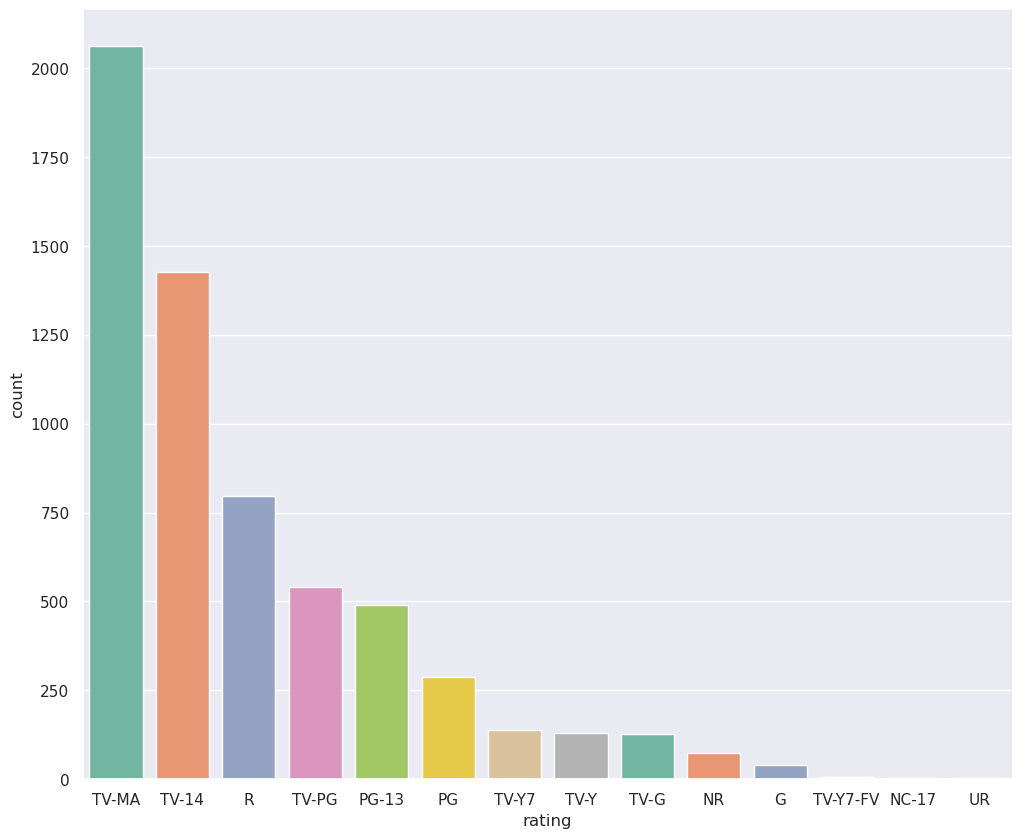

In [28]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

<h2>**Top TV Show Ratings**

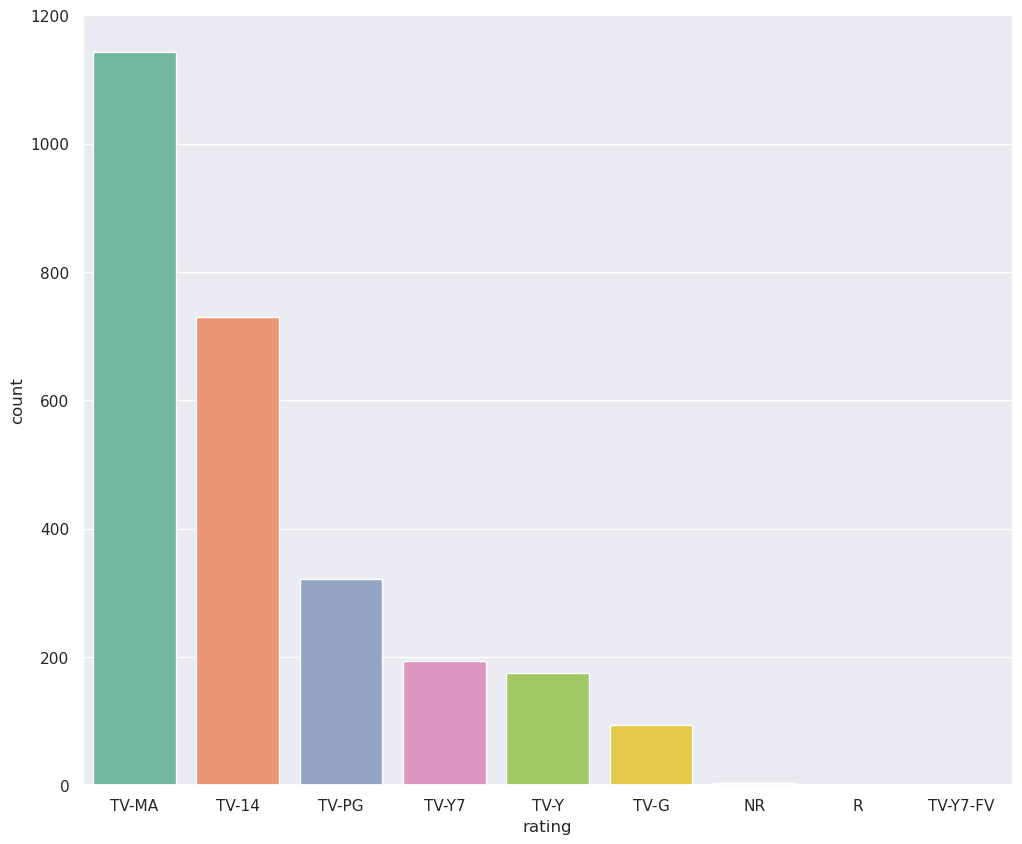

In [29]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_tv, palette="Set2", order=netflix_tv['rating'].value_counts().index[0:15])

<h2>**Month with most content released**

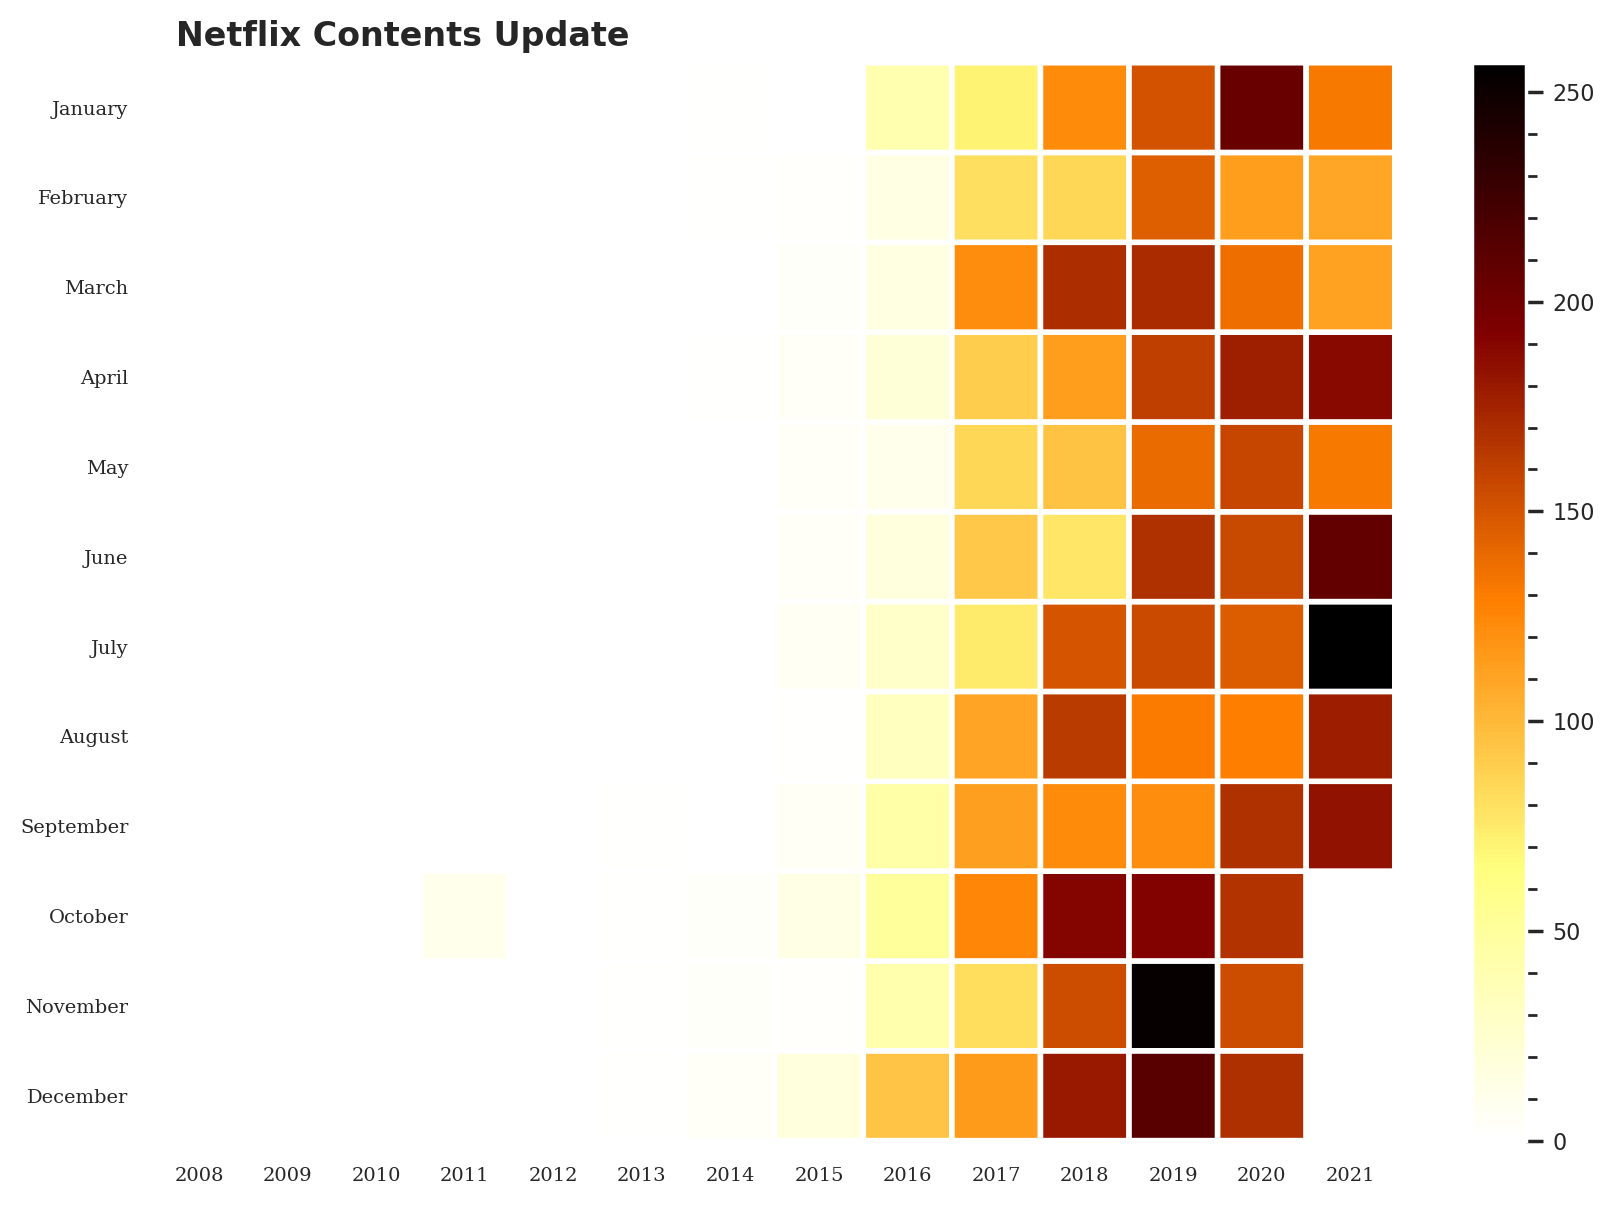

In [30]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = data.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

<h2>**Total Movie Released Over The Years**

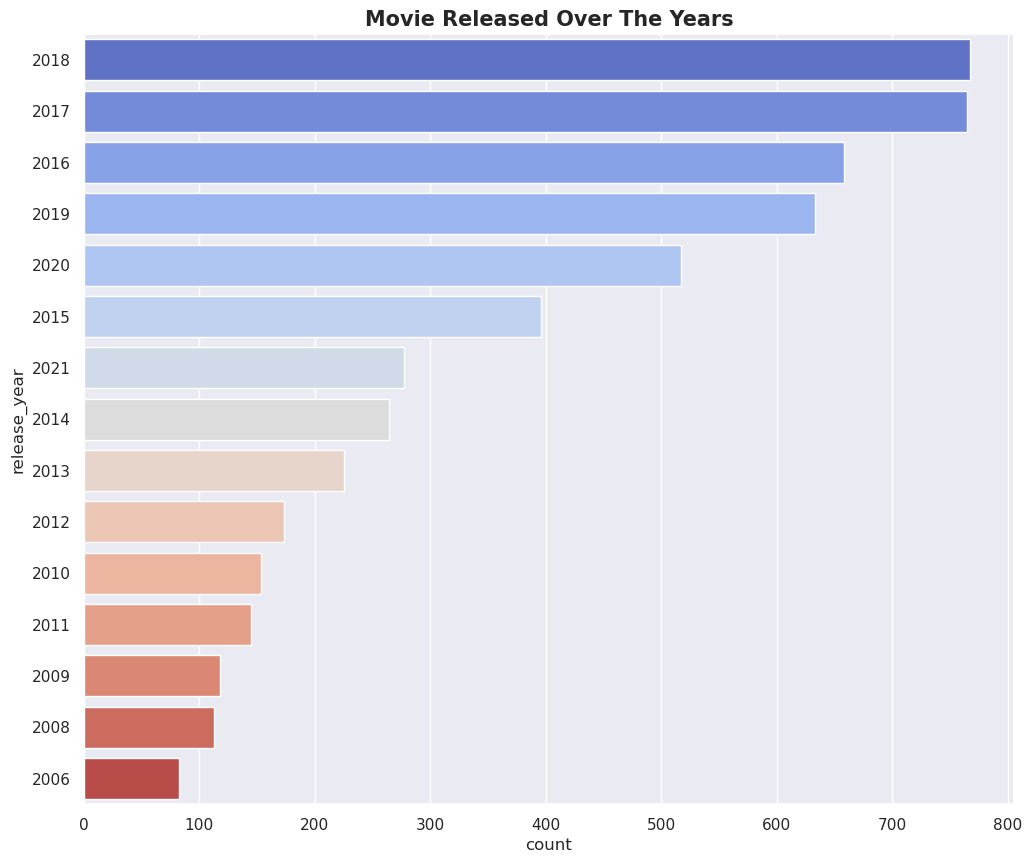

In [31]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="coolwarm", order=netflix_movies['release_year'].value_counts().index[0:15])

plt.title('Movie Released Over The Years', fontsize=15, fontweight='bold')
plt.show()

<h2>Total TV Show Released Over The Years
    

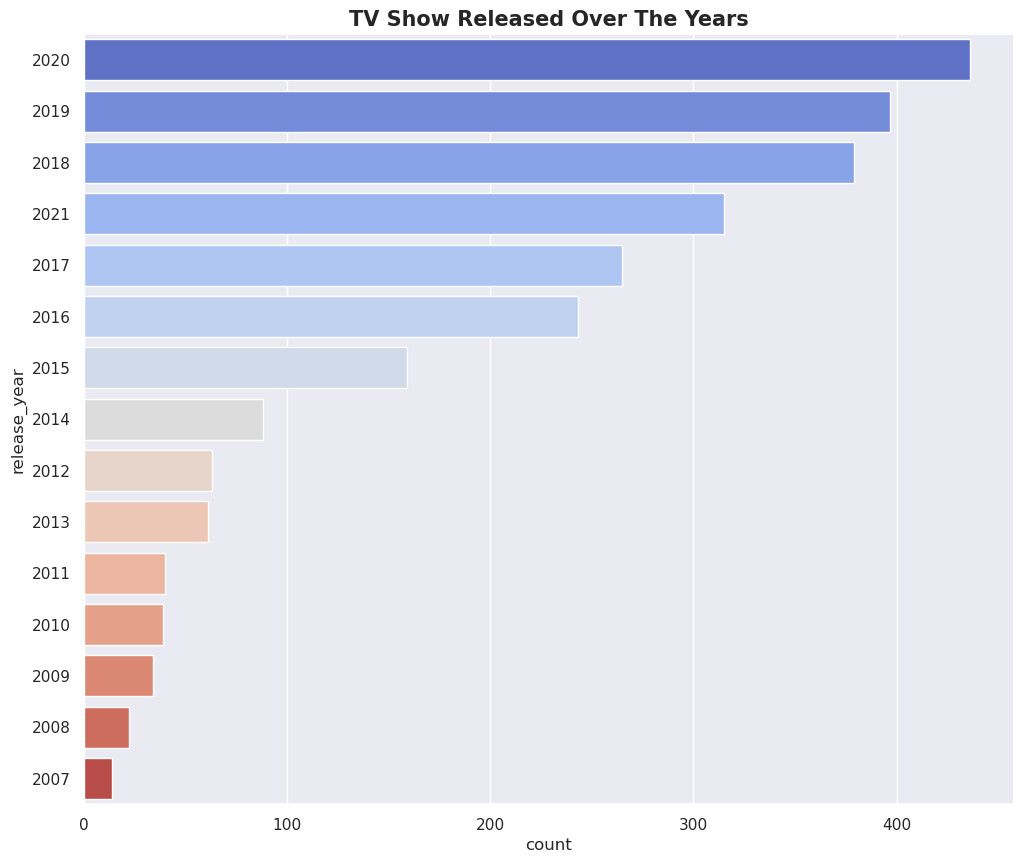

In [32]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_tv, palette="coolwarm", order=netflix_tv['release_year'].value_counts().index[0:15])

plt.title('TV Show Released Over The Years', fontsize=15, fontweight='bold')
plt.show()

<h2>Distribution of Movie duration

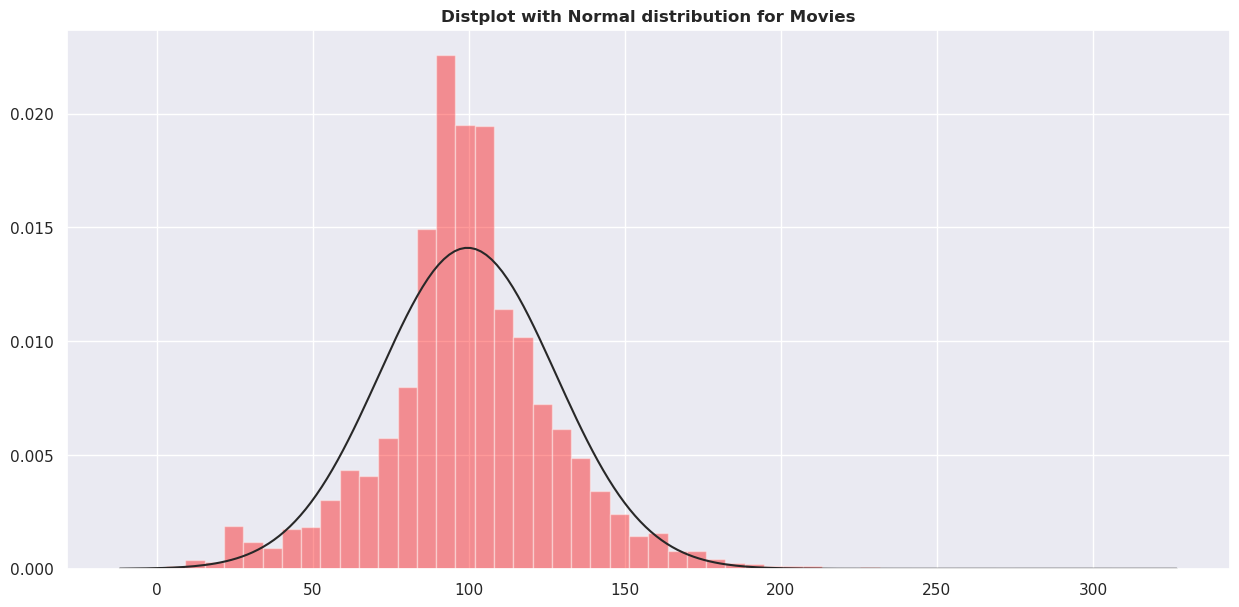

In [33]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(netflix_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

It is evident that majority of the movies have duration ranging from 85 min to 120 min.

<h2>Top 10 Genre in Movies and TV Show

<h4> Top 10 Movies Genre

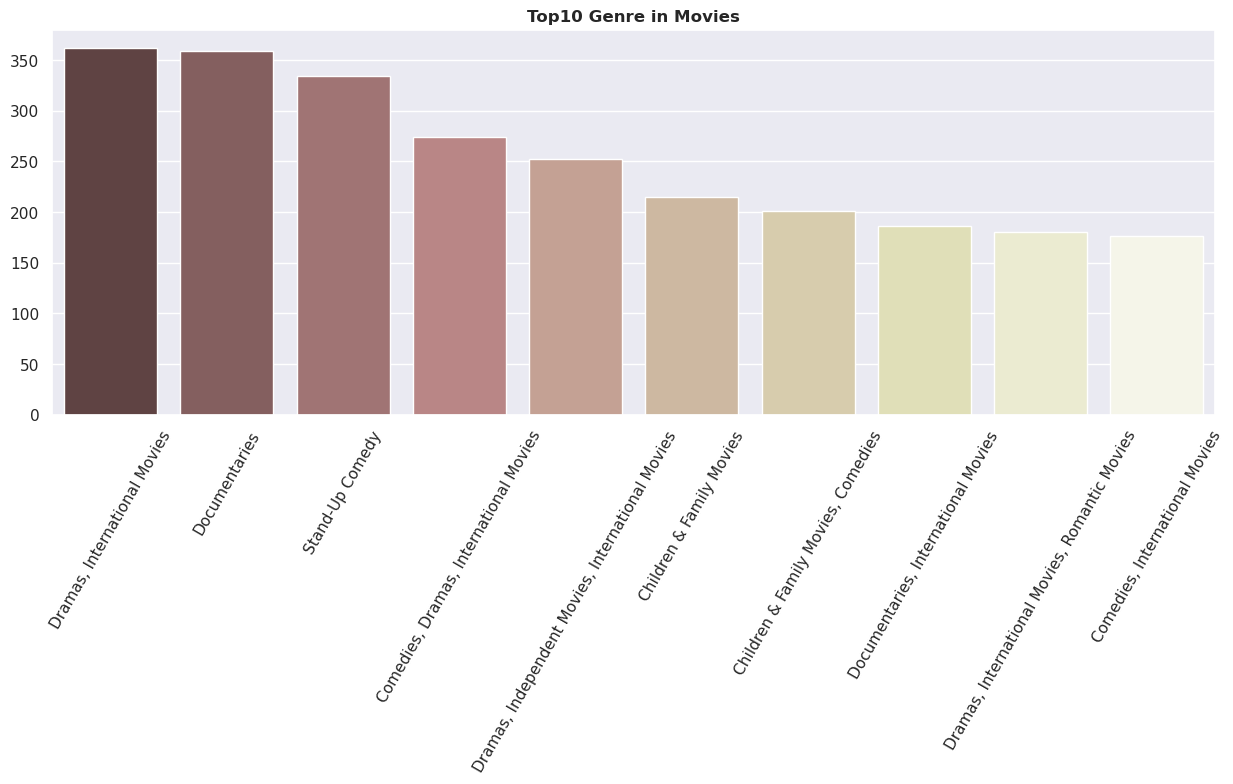

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x = netflix_movies["listed_in"].value_counts().head(10).index,
            y = netflix_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

<h4> Top 10 TV Shows Genre

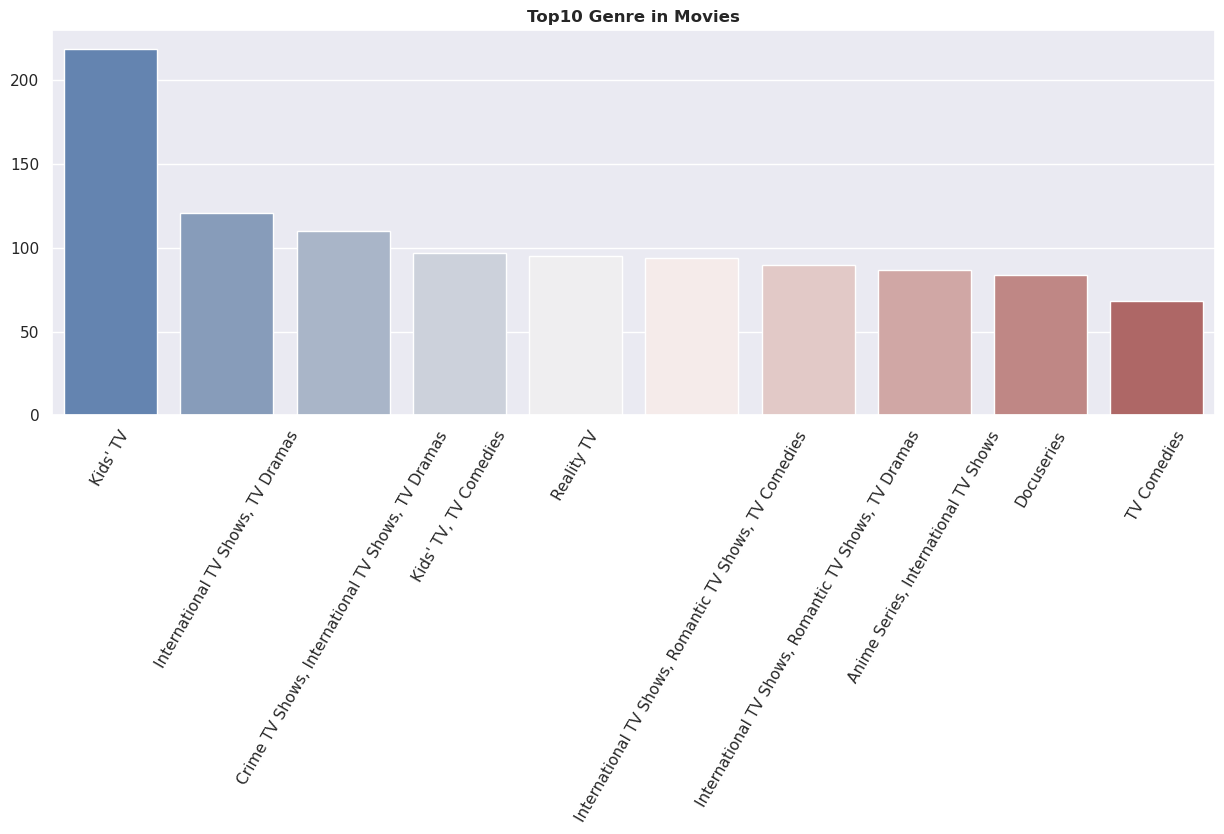

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x = netflix_tv["listed_in"].value_counts().head(10).index,
            y = netflix_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

<h2> Top 10 countries producing most contents

In [36]:
from collections import Counter
country_data = data['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top10country = country_count.head(10)

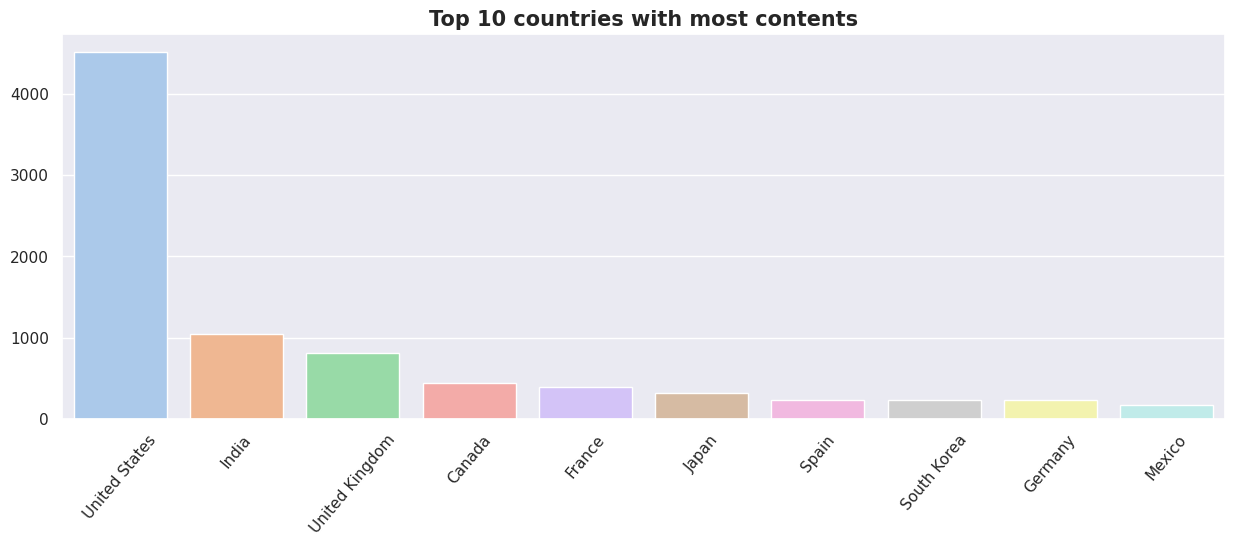

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x= top10country.index, y=top10country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

<h2> World Cloud Movie and TV Show Genre

<h3> World Cloud-Movie Genre

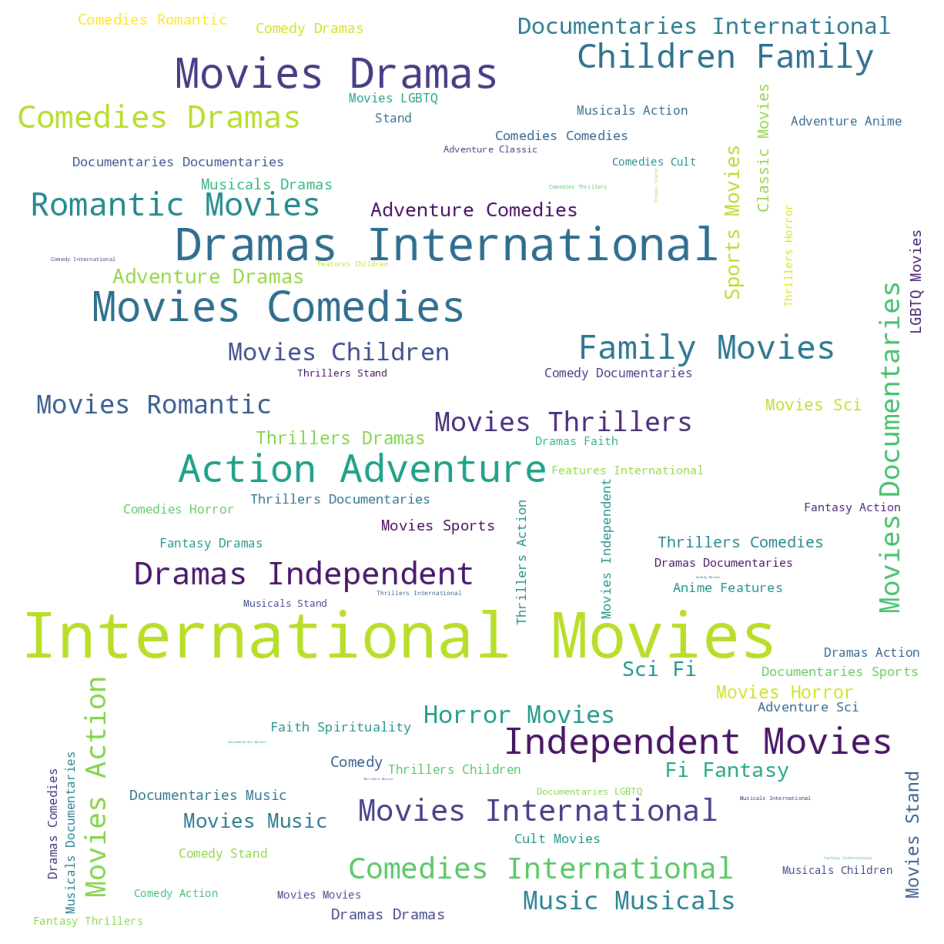

In [38]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(netflix_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h3> World Cloud-TV Show Genre

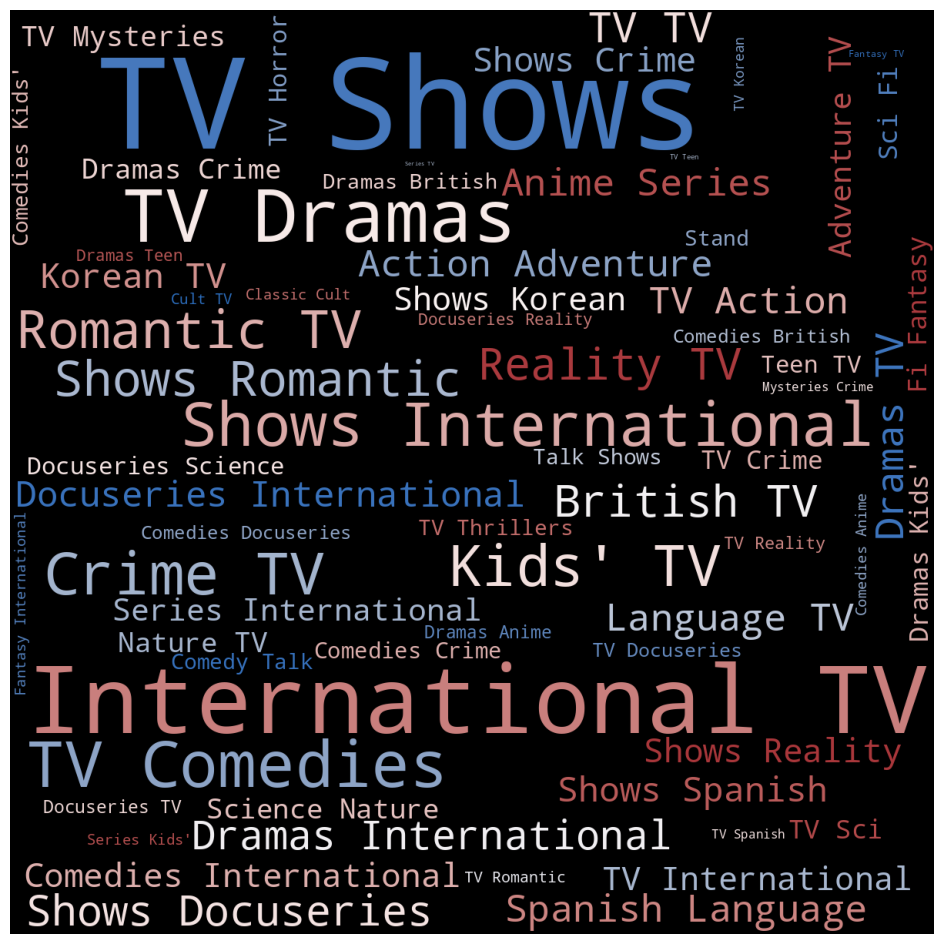

In [39]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(netflix_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()